In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/paro.csv', sep=';')
df

,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,Ambos sexos,Total Nacional,Total,2023T4,"11,76"
1,Ambos sexos,Total Nacional,Total,2023T3,"11,84"
2,Ambos sexos,Total Nacional,Total,2023T2,"11,60"
3,Ambos sexos,Total Nacional,Total,2023T1,"13,26"
4,Ambos sexos,Total Nacional,Total,2022T4,"12,87"
...,...,...,...,...,...
36955,Mujeres,19 Melilla,55 y más años,2003T1,"0,00"
36956,Mujeres,19 Melilla,55 y más años,2002T4,"0,00"
36957,Mujeres,19 Melilla,55 y más años,2002T3,"0,00"
36958,Mujeres,19 Melilla,55 y más años,2002T2,"0,00"


In [3]:
df2 = pd.read_csv('../data/actividad_paro_empleo(poblacionenviviendasfamiliares).csv', sep=';')
df2

,Sexo,Provincias,Tasas,Periodo,Total
0,Ambos sexos,Total Nacional,Tasa de actividad,2023T4,"58,99"
1,Ambos sexos,Total Nacional,Tasa de actividad,2023T3,"59,41"
2,Ambos sexos,Total Nacional,Tasa de actividad,2023T2,"58,97"
3,Ambos sexos,Total Nacional,Tasa de actividad,2023T1,"58,55"
4,Ambos sexos,Total Nacional,Tasa de actividad,2022T4,"58,52"
...,...,...,...,...,...
41971,Mujeres,52 Melilla,Tasa de empleo de la población,2003T1,"30,09"
41972,Mujeres,52 Melilla,Tasa de empleo de la población,2002T4,"29,64"
41973,Mujeres,52 Melilla,Tasa de empleo de la población,2002T3,"31,53"
41974,Mujeres,52 Melilla,Tasa de empleo de la población,2002T2,"30,03"


In [4]:
df2['Total'].value_counts()

Total
55,77    24
47,97    23
58,91    22
50,51    21
57,17    21
         ..
23,08     1
28,87     1
70,32     1
70,16     1
27,13     1
Name: count, Length: 6981, dtype: int64

In [5]:
df2['Total'] = df2['Total'].str.replace(',,','.')

In [6]:
df2 = df2.drop(27894)

In [7]:
df2['Total'] = df2['Total'].str.replace(',','.')

In [8]:
df2['Total'] = df2['Total'].str.replace('..','.')

In [9]:
df2['Total'] = df2['Total'].astype(float)
df2

,Sexo,Provincias,Tasas,Periodo,Total
0,Ambos sexos,Total Nacional,Tasa de actividad,2023T4,58.99
1,Ambos sexos,Total Nacional,Tasa de actividad,2023T3,59.41
2,Ambos sexos,Total Nacional,Tasa de actividad,2023T2,58.97
3,Ambos sexos,Total Nacional,Tasa de actividad,2023T1,58.55
4,Ambos sexos,Total Nacional,Tasa de actividad,2022T4,58.52
...,...,...,...,...,...
41971,Mujeres,52 Melilla,Tasa de empleo de la población,2003T1,30.09
41972,Mujeres,52 Melilla,Tasa de empleo de la población,2002T4,29.64
41973,Mujeres,52 Melilla,Tasa de empleo de la población,2002T3,31.53
41974,Mujeres,52 Melilla,Tasa de empleo de la población,2002T2,30.03


In [10]:
df2['Periodo'] = df2['Periodo'].str.replace('T4', '-09-01').str.replace('T3', '-06-01').str.replace('T2', '-03-01').str.replace('T1', '-01-01')

In [11]:
df2['Periodo'] = pd.to_datetime(df2['Periodo'], format='%Y-%m-%d')

In [12]:
df2['Tasas'].unique()

array(['Tasa de actividad', 'Tasa de paro de la población',
       'Tasa de empleo de la población'], dtype=object)

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41975 entries, 0 to 41975
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Sexo        41975 non-null  object        
 1   Provincias  41975 non-null  object        
 2   Tasas       41975 non-null  object        
 3   Periodo     41975 non-null  datetime64[ns]
 4   Total       41975 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.9+ MB


In [14]:
aa = df2[df2['Sexo']=='Ambos sexos']

In [15]:
aa.Tasas.value_counts()

Tasas
Tasa de actividad                 4664
Tasa de paro de la población      4664
Tasa de empleo de la población    4664
Name: count, dtype: int64

In [16]:
act = aa[aa['Tasas']=='Tasa de actividad']
paro = aa[aa['Tasas']=='Tasa de paro de la población']
empl = aa[aa['Tasas']=='Tasa de empleo de la población']

In [17]:
act.Provincias.unique()

array(['Total Nacional', '02 Albacete', '03 Alicante/Alacant',
       '04 Almería', '01 Araba/Álava', '33 Asturias', '05 Ávila',
       '06 Badajoz', '07 Balears, Illes', '08 Barcelona', '48 Bizkaia',
       '09 Burgos', '10 Cáceres', '11 Cádiz', '39 Cantabria',
       '12 Castellón/Castelló', '13 Ciudad Real', '14 Córdoba',
       '15 Coruña, A', '16 Cuenca', '20 Gipuzkoa', '17 Girona',
       '18 Granada', '19 Guadalajara', '21 Huelva', '22 Huesca',
       '23 Jaén', '24 León', '25 Lleida', '27 Lugo', '28 Madrid',
       '29 Málaga', '30 Murcia', '31 Navarra', '32 Ourense',
       '34 Palencia', '35 Palmas, Las', '36 Pontevedra', '26 Rioja, La',
       '37 Salamanca', '38 Santa Cruz de Tenerife', '40 Segovia',
       '41 Sevilla', '42 Soria', '43 Tarragona', '44 Teruel', '45 Toledo',
       '46 Valencia/València', '47 Valladolid', '49 Zamora',
       '50 Zaragoza', '51 Ceuta', '52 Melilla'], dtype=object)

In [18]:
act_mad = act[act['Provincias']=='28 Madrid'].sort_values(by='Periodo')
paro_mad = paro[paro['Provincias']=='28 Madrid'].sort_values(by='Periodo')
empl_mad = empl[empl['Provincias']=='28 Madrid'].sort_values(by='Periodo')

In [19]:
act_nac = act[act['Provincias']=='Total Nacional'].sort_values(by='Periodo')
paro_nac = paro[paro['Provincias']=='Total Nacional'].sort_values(by='Periodo')
empl_nac = empl[empl['Provincias']=='Total Nacional'].sort_values(by='Periodo')

In [20]:
act_mad

,Sexo,Provincias,Tasas,Periodo,Total
8007,Ambos sexos,28 Madrid,Tasa de actividad,2002-01-01,58.40
8006,Ambos sexos,28 Madrid,Tasa de actividad,2002-03-01,58.60
8005,Ambos sexos,28 Madrid,Tasa de actividad,2002-06-01,59.16
8004,Ambos sexos,28 Madrid,Tasa de actividad,2002-09-01,58.80
8003,Ambos sexos,28 Madrid,Tasa de actividad,2003-01-01,59.16
...,...,...,...,...,...
7924,Ambos sexos,28 Madrid,Tasa de actividad,2022-09-01,63.21
7923,Ambos sexos,28 Madrid,Tasa de actividad,2023-01-01,63.29
7922,Ambos sexos,28 Madrid,Tasa de actividad,2023-03-01,63.43
7921,Ambos sexos,28 Madrid,Tasa de actividad,2023-06-01,63.31


In [21]:
paro_mad

,Sexo,Provincias,Tasas,Periodo,Total
8095,Ambos sexos,28 Madrid,Tasa de paro de la población,2002-01-01,7.49
8094,Ambos sexos,28 Madrid,Tasa de paro de la población,2002-03-01,6.96
8093,Ambos sexos,28 Madrid,Tasa de paro de la población,2002-06-01,7.75
8092,Ambos sexos,28 Madrid,Tasa de paro de la población,2002-09-01,6.99
8091,Ambos sexos,28 Madrid,Tasa de paro de la población,2003-01-01,7.77
...,...,...,...,...,...
8012,Ambos sexos,28 Madrid,Tasa de paro de la población,2022-09-01,11.51
8011,Ambos sexos,28 Madrid,Tasa de paro de la población,2023-01-01,11.01
8010,Ambos sexos,28 Madrid,Tasa de paro de la población,2023-03-01,9.56
8009,Ambos sexos,28 Madrid,Tasa de paro de la población,2023-06-01,10.53


In [22]:
empl_mad

,Sexo,Provincias,Tasas,Periodo,Total
8183,Ambos sexos,28 Madrid,Tasa de empleo de la población,2002-01-01,54.03
8182,Ambos sexos,28 Madrid,Tasa de empleo de la población,2002-03-01,54.52
8181,Ambos sexos,28 Madrid,Tasa de empleo de la población,2002-06-01,54.58
8180,Ambos sexos,28 Madrid,Tasa de empleo de la población,2002-09-01,54.69
8179,Ambos sexos,28 Madrid,Tasa de empleo de la población,2003-01-01,54.56
...,...,...,...,...,...
8100,Ambos sexos,28 Madrid,Tasa de empleo de la población,2022-09-01,55.93
8099,Ambos sexos,28 Madrid,Tasa de empleo de la población,2023-01-01,56.32
8098,Ambos sexos,28 Madrid,Tasa de empleo de la población,2023-03-01,57.36
8097,Ambos sexos,28 Madrid,Tasa de empleo de la población,2023-06-01,56.64


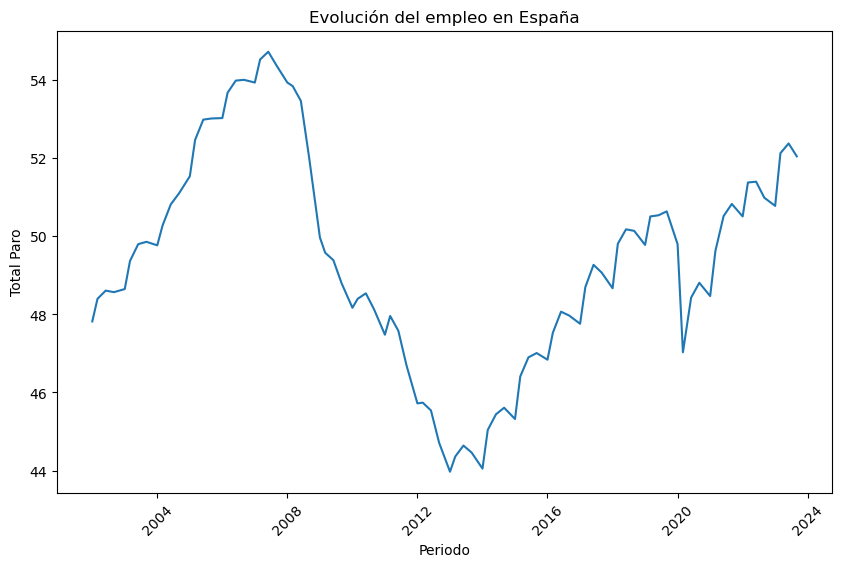

In [23]:
import matplotlib.pyplot as plt

# Suponiendo que 'paro_mad' es el DataFrame y 'Periodo' y 'Total' son las columnas de interés
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
plt.plot(empl_nac['Periodo'], empl_nac['Total'])  # Crear el gráfico de línea

# Añadir etiquetas
plt.title('Evolución del empleo en España')  # Título del gráfico
plt.xlabel('Periodo')  # Etiqueta del eje x
plt.ylabel('Total Paro')  # Etiqueta del eje y

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

# Mostrar el gráfico
plt.show()

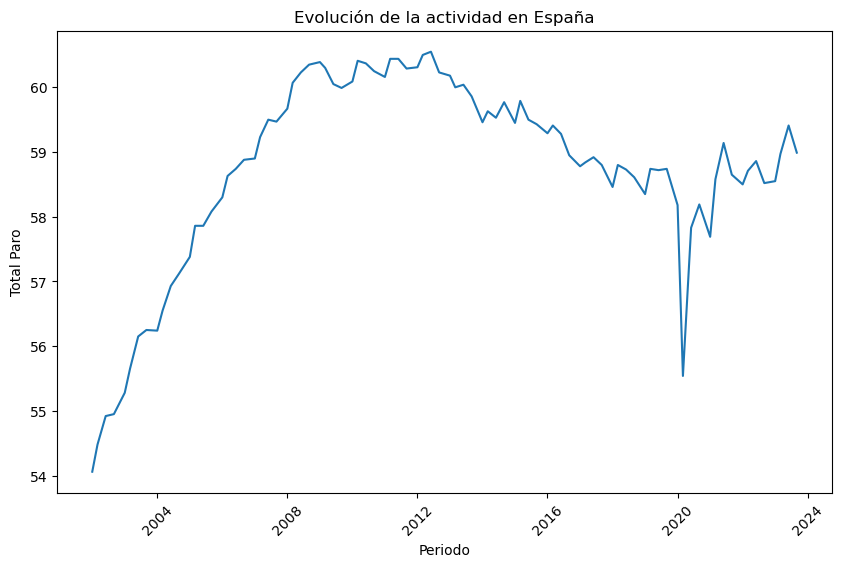

In [24]:
import matplotlib.pyplot as plt

# Suponiendo que 'paro_mad' es el DataFrame y 'Periodo' y 'Total' son las columnas de interés
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
plt.plot(act_nac['Periodo'], act_nac['Total'])  # Crear el gráfico de línea

# Añadir etiquetas
plt.title('Evolución de la actividad en España')  # Título del gráfico
plt.xlabel('Periodo')  # Etiqueta del eje x
plt.ylabel('Total Paro')  # Etiqueta del eje y

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

# Mostrar el gráfico
plt.show()

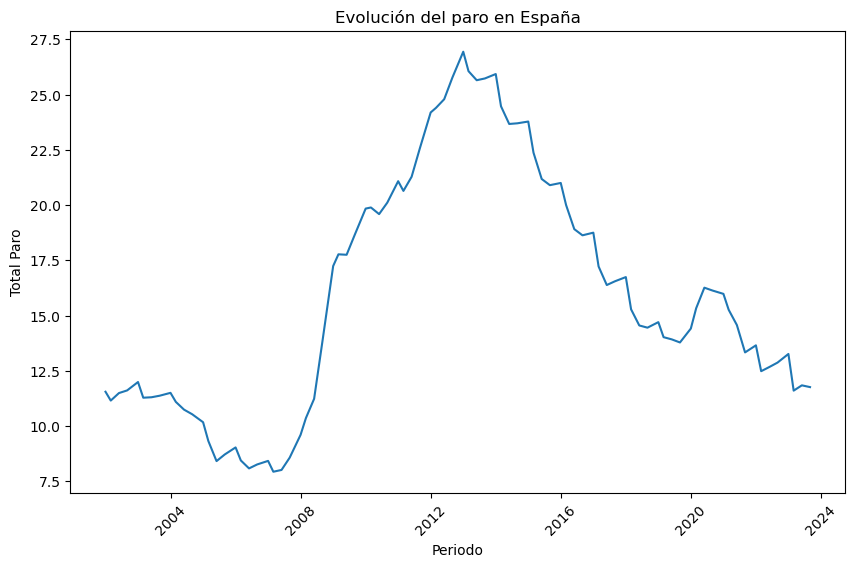

In [25]:
import matplotlib.pyplot as plt

# Suponiendo que 'paro_mad' es el DataFrame y 'Periodo' y 'Total' son las columnas de interés
plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico
plt.plot(paro_nac['Periodo'], paro_nac['Total'])  # Crear el gráfico de línea

# Añadir etiquetas
plt.title('Evolución del paro en España')  # Título del gráfico
plt.xlabel('Periodo')  # Etiqueta del eje x
plt.ylabel('Total Paro')  # Etiqueta del eje y

plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad

# Mostrar el gráfico
plt.show()

In [26]:
comunidades_autonomas = {
    'Andalucía': ['Almería', 'Cádiz', 'Córdoba', 'Granada', 'Huelva', 'Jaén', 'Málaga', 'Sevilla'],
    'Aragón': ['Huesca', 'Teruel', 'Zaragoza'],
    'Asturias': ['Asturias'],
    'Islas Baleares': ['Islas Baleares'],
    'Canarias': ['Las Palmas', 'Santa Cruz de Tenerife'],
    'Cantabria': ['Cantabria'],
    'Castilla-La Mancha': ['Albacete', 'Ciudad Real', 'Cuenca', 'Guadalajara', 'Toledo'],
    'Castilla y León': ['Ávila', 'Burgos', 'León', 'Palencia', 'Salamanca', 'Segovia', 'Soria', 'Valladolid', 'Zamora'],
    'Cataluña': ['Barcelona', 'Girona', 'Lérida', 'Tarragona'],
    'Ceuta': ['Ceuta'],
    'Comunidad Valenciana': ['Alicante', 'Castellón', 'Valencia'],
    'Extremadura': ['Badajoz', 'Cáceres'],
    'Galicia': ['A Coruña', 'Lugo', 'Ourense', 'Pontevedra'],
    'Madrid': ['Madrid'],
    'Melilla': ['Melilla'],
    'Murcia': ['Murcia'],
    'Navarra': ['Navarra'],
    'País Vasco': ['Alava', 'Vizcaya', 'Gipuzkoa'],
    'La Rioja': ['La Rioja'],
    'España':['Total Nacional']
}

In [27]:
pob = pd.read_csv('../data/poblacion_miles_porcentaje.csv', sep=';')

In [28]:
sal_act = pd.read_csv('../data/salario_actividad.csv', sep=';')

In [29]:
estu = pd.read_csv('../data/estudios_miles_porcentaje.csv', sep=';')

In [30]:
sal_sect = pd.read_csv('../data/ganancia_media_anual_comunidadysector.csv', sep=';')

In [31]:
act_sec = pd.read_csv('../data/%activos_sector_provincia.csv', sep=';')

In [32]:
paro = pd.read_csv('../data/paro.csv', sep=';')

In [33]:
estudios = pd.read_csv('../data/estudios_comunidad.csv', sep=';')

In [34]:
estudios

,Sexo,Comunidades y Ciudades Autónomas,Nivel de formación alcanzado,Periodo,Total
0,Ambos sexos,Total Nacional,Total,2023T4,100
1,Ambos sexos,Total Nacional,Total,2023T3,100
2,Ambos sexos,Total Nacional,Total,2023T2,100
3,Ambos sexos,Total Nacional,Total,2023T1,100
4,Ambos sexos,Total Nacional,Total,2022T4,100
...,...,...,...,...,...
19195,Mujeres,19 Melilla,Educación superior,2015T1,"18,8"
19196,Mujeres,19 Melilla,Educación superior,2014T4,22
19197,Mujeres,19 Melilla,Educación superior,2014T3,"18,7"
19198,Mujeres,19 Melilla,Educación superior,2014T2,"18,5"


In [35]:
estudios['Total'] = estudios['Total'].str.replace('..','0')
estudios['Total'] = estudios['Total'].str.replace(',','.')
estudios['Total'] = estudios['Total'].astype(float)

In [36]:
estudios['Periodo'] = estudios['Periodo'].str.replace('T4', '-09-01').str.replace('T3', '-06-01').str.replace('T2', '-03-01').str.replace('T1', '-01-01')
estudios['Periodo'] = pd.to_datetime(estudios['Periodo'], format='%Y-%m-%d')

In [37]:
estudios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Sexo                              19200 non-null  object        
 1   Comunidades y Ciudades Autónomas  19200 non-null  object        
 2   Nivel de formación alcanzado      19200 non-null  object        
 3   Periodo                           19200 non-null  datetime64[ns]
 4   Total                             19200 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 750.1+ KB


In [38]:
estudios['Comunidades y Ciudades Autónomas'] = estudios['Comunidades y Ciudades Autónomas'].apply(lambda x: ''.join(filter(lambda char: not char.isdigit(), x)))

In [39]:
estudios['Comunidades y Ciudades Autónomas'] = estudios['Comunidades y Ciudades Autónomas'].str.strip()

In [40]:
estudios = estudios.rename(columns={'Comunidades y Ciudades Autónomas':'Comunidades autónomas'})

In [41]:
estudios['Comunidades autónomas'] = estudios['Comunidades autónomas'].str.replace('Total Nacional','España').str.replace('Asturias, Principado de','Asturias').str.replace('Balears, Illes','Islas Baleares').str.replace('Castilla - La Mancha','Castilla-La Mancha').str.replace('Madrid, Comunidad de','Madrid').str.replace('Murcia, Región de','Murcia').str.replace('Navarra, Comunidad Foral de','Navarra').str.replace('Rioja, La','La Rioja').str.replace('Comunitat Valenciana','Comunidad Valenciana')

In [42]:
estudios['Comunidades autónomas'].unique()

array(['España', 'Andalucía', 'Aragón', 'Asturias', 'Islas Baleares',
       'Canarias', 'Cantabria', 'Castilla y León', 'Castilla-La Mancha',
       'Cataluña', 'Comunidad Valenciana', 'Extremadura', 'Galicia',
       'Madrid', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja', 'Ceuta',
       'Melilla'], dtype=object)

In [43]:
estudios['Nivel de formación alcanzado'].unique()

array(['Total', 'Analfabetos', 'Estudios primarios incompletos',
       'Educación primaria',
       'Primera etapa de educación secundaria y similar',
       'Segunda etapa de educación secundaria, con orientación general',
       'Segunda etapa de educación secundaria con orientación profesional (incluye educación postsecundaria no superior)',
       'Educación superior'], dtype=object)

In [44]:
estudios['Nivel de formación alcanzado'] = estudios['Nivel de formación alcanzado'].str.replace('Primera etapa de educación secundaria y similar','Educación secundaria').str.replace('Segunda etapa de educación secundaria, con orientación general','Bachillerato').str.replace('Segunda etapa de educación secundaria con orientación profesional (incluye educación postsecundaria no superior)','Bachillerato y FP inferior a 2 años')

In [45]:
estudios['Nivel de formación alcanzado'] = estudios['Nivel de formación alcanzado'].str.replace('Analfabetos','0 Analfabetos').str.replace('Estudios primarios incompletos','1 Primaria incompleta').str.replace('Educación primaria','2 Primaria').str.replace('Educación secundaria','3 Secundaria').str.replace('Bachillerato','4 Bachillerato').str.replace('Bachillerato y FP inferior a 2 años','5 Bachillerato y FP inferior a 2 años').str.replace('Educación superior','6 Superior')

In [46]:
estudios['Nivel de formación alcanzado'] = estudios['Nivel de formación alcanzado'].str.replace('4 5 Bachillerato y FP inferior a 2 años','5 Bachillerato y FP inferior a 2 años')

In [47]:
def educacion(valor):
    if valor == '0 Analfabetos' or valor == '1 Estudios primarios incompletos':
        return '0Sin educación'
    elif valor == '2 Educación primaria':
        return '1Primaria'
    elif valor == '3 Educación secundaria':
        return '2Secundaria'
    elif valor == '4 Bachillerato' or valor == '5 Bachillerato y FP inferior a 2 años':
        return '3Bachillerato'
    else:
        return '4Educación superior'  

In [48]:
estudios['Educación'] = estudios['Nivel de formación alcanzado'].apply(educacion)

In [49]:
estudios['Educación'].unique()

array(['4Educación superior', '0Sin educación', '3Bachillerato'],
      dtype=object)

In [50]:
comunidades = {
    'Andalucía': '12 Andalucía',
    'Aragón': '06 Aragón',
    'Asturias': '05 Asturias',
    'Islas Baleares': '13 Islas Baleares',
    'Canarias': '11 Canarias',
    'Cantabria': '02 Cantabria',
    'Castilla-La Mancha': '17 Castilla-La Mancha',
    'Castilla y León': '09 Castilla y León',
    'Cataluña': '04 Cataluña',
    'Ceuta': '18 Ceuta',
    'Comunidad Valenciana': '10 Comunidad Valenciana',
    'Extremadura': '16 Extremadura',
    'Galicia': '07 Galicia',
    'Madrid': '01 Madrid',
    'Melilla': '14 Melilla',
    'Murcia': '15 Murcia',
    'Navarra': '03 Navarra',
    'País Vasco': '00 País Vasco',
    'La Rioja': '08 La Rioja'
} 

In [51]:
estudios['Comunidades autónomas'] = estudios['Comunidades autónomas'].replace(comunidades)

In [52]:
estudios['Comunidades autónomas'].unique()

array(['España', '12 Andalucía', '06 Aragón', '05 Asturias',
       '13 Islas Baleares', '11 Canarias', '02 Cantabria',
       '09 Castilla y León', '17 Castilla-La Mancha', '04 Cataluña',
       '10 Comunidad Valenciana', '16 Extremadura', '07 Galicia',
       '01 Madrid', '15 Murcia', '03 Navarra', '00 País Vasco',
       '08 La Rioja', '18 Ceuta', '14 Melilla'], dtype=object)

In [53]:
estudios

,Sexo,Comunidades autónomas,Nivel de formación alcanzado,Periodo,Total,Educación
0,Ambos sexos,España,Total,2023-09-01,100.0,4Educación superior
1,Ambos sexos,España,Total,2023-06-01,100.0,4Educación superior
2,Ambos sexos,España,Total,2023-03-01,100.0,4Educación superior
3,Ambos sexos,España,Total,2023-01-01,100.0,4Educación superior
4,Ambos sexos,España,Total,2022-09-01,100.0,4Educación superior
...,...,...,...,...,...,...
19195,Mujeres,14 Melilla,6 Superior,2015-01-01,18.8,4Educación superior
19196,Mujeres,14 Melilla,6 Superior,2014-09-01,22.0,4Educación superior
19197,Mujeres,14 Melilla,6 Superior,2014-06-01,18.7,4Educación superior
19198,Mujeres,14 Melilla,6 Superior,2014-03-01,18.5,4Educación superior


In [54]:
estudios[estudios['Periodo']=='2023-09-01']

,Sexo,Comunidades autónomas,Nivel de formación alcanzado,Periodo,Total,Educación
0,Ambos sexos,España,Total,2023-09-01,100.0,4Educación superior
40,Ambos sexos,España,0 Analfabetos,2023-09-01,1.2,0Sin educación
80,Ambos sexos,España,1 Primaria incompleta,2023-09-01,3.9,4Educación superior
120,Ambos sexos,España,2 Primaria,2023-09-01,10.5,4Educación superior
160,Ambos sexos,España,3 Secundaria,2023-09-01,28.3,4Educación superior
...,...,...,...,...,...,...
19000,Mujeres,14 Melilla,2 Primaria,2023-09-01,17.4,4Educación superior
19040,Mujeres,14 Melilla,3 Secundaria,2023-09-01,19.4,4Educación superior
19080,Mujeres,14 Melilla,4 Bachillerato,2023-09-01,13.5,3Bachillerato
19120,Mujeres,14 Melilla,5 Bachillerato y FP inferior a 2 años,2023-09-01,8.5,3Bachillerato


In [55]:
estu

,Grupo de edad,Nivel de estudios,Personas sin y con discapacidad,año,Total
0,Total,Total,Total,2022,"30.656,9"
1,Total,Total,Total,2021,"30.555,8"
2,Total,Total,Total,2020,"30.601,4"
3,Total,Total,Total,2019,"30.419,3"
4,Total,Total,Total,2018,"30.180,6"
...,...,...,...,...,...
859,De 45 a 64 años,"Superiores, incluyendo doctorado",Porcentaje vertical: Personas con discapacidad,2018,"16,6"
860,De 45 a 64 años,"Superiores, incluyendo doctorado",Porcentaje vertical: Personas con discapacidad,2017,"17,0"
861,De 45 a 64 años,"Superiores, incluyendo doctorado",Porcentaje vertical: Personas con discapacidad,2016,"15,1"
862,De 45 a 64 años,"Superiores, incluyendo doctorado",Porcentaje vertical: Personas con discapacidad,2015,"14,8"


In [56]:
estu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Grupo de edad                    864 non-null    object
 1   Nivel de estudios                864 non-null    object
 2   Personas sin y con discapacidad  864 non-null    object
 3   año                              864 non-null    int64 
 4   Total                            864 non-null    object
dtypes: int64(1), object(4)
memory usage: 33.9+ KB


In [57]:
estu['Total'] = estu['Total'].str.replace('.','')
estu['Total'] = estu['Total'].str.replace(',','.')
estu['Total'] = estu['Total'].astype(float)

In [58]:
estu['Grupo de edad'].unique()

array(['Total', 'De 16 a 24 años', 'De 25 a 44 años', 'De 45 a 64 años'],
      dtype=object)

In [59]:
estu['Nivel de estudios'].unique()

array(['Total', 'Analfabetos y primaria',
       'Secundaria y programas formación e inserción laboral',
       'Superiores, incluyendo doctorado'], dtype=object)

In [60]:
estu['Personas sin y con discapacidad'].unique()

array(['Total', 'Personas sin discapacidad', 'Personas con discapacidad',
       'Porcentaje vertical: Total',
       'Porcentaje vertical: Personas sin discapacidad',
       'Porcentaje vertical: Personas con discapacidad'], dtype=object)

In [61]:
paro

,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
0,Ambos sexos,Total Nacional,Total,2023T4,"11,76"
1,Ambos sexos,Total Nacional,Total,2023T3,"11,84"
2,Ambos sexos,Total Nacional,Total,2023T2,"11,60"
3,Ambos sexos,Total Nacional,Total,2023T1,"13,26"
4,Ambos sexos,Total Nacional,Total,2022T4,"12,87"
...,...,...,...,...,...
36955,Mujeres,19 Melilla,55 y más años,2003T1,"0,00"
36956,Mujeres,19 Melilla,55 y más años,2002T4,"0,00"
36957,Mujeres,19 Melilla,55 y más años,2002T3,"0,00"
36958,Mujeres,19 Melilla,55 y más años,2002T2,"0,00"


In [62]:
paro['Edad'].unique()

array(['Total', 'Menores de 25 años', '25 y más años', 'De 16 a 19 años',
       'De 20 a 24 años', 'De 25 a 54 años', '55 y más años'],
      dtype=object)

In [63]:
paro['Total'].unique()

array(['11,76', '11,84', '11,60', ..., '57,90', '1,34', '1,39'],
      dtype=object)

In [64]:
paro['Total'] = paro['Total'].str.replace('..','0')

In [65]:
paro['Total'] = paro['Total'].str.replace(',','.')

In [66]:
paro['Total'] = paro['Total'].astype(float)

In [67]:
paro['Periodo'] = paro['Periodo'].str.replace('T4', '-09-01').str.replace('T3', '-06-01').str.replace('T2', '-03-01').str.replace('T1', '-01-01')
paro['Periodo'] = pd.to_datetime(paro['Periodo'], format='%Y-%m-%d')

In [68]:
paro['Comunidades y Ciudades Autónomas'] = paro['Comunidades y Ciudades Autónomas'].apply(lambda x: ''.join(filter(lambda char: not char.isdigit(), x)))

In [69]:
paro['Comunidades y Ciudades Autónomas'] = paro['Comunidades y Ciudades Autónomas'].str.strip()

In [70]:
paro = paro.rename(columns={'Comunidades y Ciudades Autónomas':'Comunidades autónomas'})

In [71]:
paro['Comunidades autónomas'] = paro['Comunidades autónomas'].str.replace('Total Nacional','España').str.replace('Asturias, Principado de','Asturias').str.replace('Balears, Illes','Islas Baleares').str.replace('Castilla - La Mancha','Castilla-La Mancha').str.replace('Madrid, Comunidad de','Madrid').str.replace('Murcia, Región de','Murcia').str.replace('Navarra, Comunidad Foral de','Navarra').str.replace('Rioja, La','La Rioja').str.replace('Comunitat Valenciana','Comunidad Valenciana')

In [72]:
paro['Comunidades autónomas'].unique()

array(['España', 'Andalucía', 'Aragón', 'Asturias', 'Islas Baleares',
       'Canarias', 'Cantabria', 'Castilla y León', 'Castilla-La Mancha',
       'Cataluña', 'Comunidad Valenciana', 'Extremadura', 'Galicia',
       'Madrid', 'Murcia', 'Navarra', 'País Vasco', 'La Rioja', 'Ceuta',
       'Melilla'], dtype=object)

In [73]:
paro.isna().sum()

Sexo                     0
Comunidades autónomas    0
Edad                     0
Periodo                  0
Total                    0
dtype: int64

In [74]:
paro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36960 entries, 0 to 36959
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Sexo                   36960 non-null  object        
 1   Comunidades autónomas  36960 non-null  object        
 2   Edad                   36960 non-null  object        
 3   Periodo                36960 non-null  datetime64[ns]
 4   Total                  36960 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 1.4+ MB


In [75]:
cinco = paro[paro['Sexo']=='Ambos sexos']

In [76]:
seis = cinco[cinco['Periodo']=='2023-09-01']

In [77]:
seis[seis['Edad']=='Total'].sort_values(by='Total', ascending=False)

,Sexo,Comunidades autónomas,Edad,Periodo,Total
11088,Ambos sexos,Ceuta,Total,2023-09-01,28.35
11704,Ambos sexos,Melilla,Total,2023-09-01,27.42
616,Ambos sexos,Andalucía,Total,2023-09-01,17.60
6776,Ambos sexos,Extremadura,Total,2023-09-01,16.29
3080,Ambos sexos,Canarias,Total,2023-09-01,16.19
6160,Ambos sexos,Comunidad Valenciana,Total,2023-09-01,12.65
4928,Ambos sexos,Castilla-La Mancha,Total,2023-09-01,12.45
1848,Ambos sexos,Asturias,Total,2023-09-01,11.81
0,Ambos sexos,España,Total,2023-09-01,11.76
2464,Ambos sexos,Islas Baleares,Total,2023-09-01,11.38


In [78]:
paro

,Sexo,Comunidades autónomas,Edad,Periodo,Total
0,Ambos sexos,España,Total,2023-09-01,11.76
1,Ambos sexos,España,Total,2023-06-01,11.84
2,Ambos sexos,España,Total,2023-03-01,11.60
3,Ambos sexos,España,Total,2023-01-01,13.26
4,Ambos sexos,España,Total,2022-09-01,12.87
...,...,...,...,...,...
36955,Mujeres,Melilla,55 y más años,2003-01-01,0.00
36956,Mujeres,Melilla,55 y más años,2002-09-01,0.00
36957,Mujeres,Melilla,55 y más años,2002-06-01,0.00
36958,Mujeres,Melilla,55 y más años,2002-03-01,0.00


In [79]:
tasas = df2

In [80]:
tasas['Provincias'].unique()

array(['Total Nacional', '02 Albacete', '03 Alicante/Alacant',
       '04 Almería', '01 Araba/Álava', '33 Asturias', '05 Ávila',
       '06 Badajoz', '07 Balears, Illes', '08 Barcelona', '48 Bizkaia',
       '09 Burgos', '10 Cáceres', '11 Cádiz', '39 Cantabria',
       '12 Castellón/Castelló', '13 Ciudad Real', '14 Córdoba',
       '15 Coruña, A', '16 Cuenca', '20 Gipuzkoa', '17 Girona',
       '18 Granada', '19 Guadalajara', '21 Huelva', '22 Huesca',
       '23 Jaén', '24 León', '25 Lleida', '27 Lugo', '28 Madrid',
       '29 Málaga', '30 Murcia', '31 Navarra', '32 Ourense',
       '34 Palencia', '35 Palmas, Las', '36 Pontevedra', '26 Rioja, La',
       '37 Salamanca', '38 Santa Cruz de Tenerife', '40 Segovia',
       '41 Sevilla', '42 Soria', '43 Tarragona', '44 Teruel', '45 Toledo',
       '46 Valencia/València', '47 Valladolid', '49 Zamora',
       '50 Zaragoza', '51 Ceuta', '52 Melilla'], dtype=object)

In [81]:
tasas['Provincias'] = tasas['Provincias'].apply(lambda x: ''.join(filter(lambda char: not char.isdigit(), x)))

In [82]:
tasas['Provincias'] = tasas['Provincias'].str.strip()

In [83]:
tasas['Provincias'] = tasas['Provincias'].replace({
    'Araba/Álava': 'Alava',
    'Alicante/Alacant': 'Alicante',
    'Castellón/Castelló': 'Castellón',
    'Valencia/València': 'Valencia',
    'Bizkaia': 'Vizcaya',
    'Coruña, A':'A Coruña',
    'Santa Cruz de Tenerife':'Santa Cruz de Tenerife',
    'Palmas, Las':'Las Palmas',
    'Ciudad Real':'Ciudad Real',
    'Balears, Illes':'Islas Baleares',
    'Rioja, La':'La Rioja',
    'Lleida':'Lérida',
})

In [84]:
tasas['Comunidad Autónoma'] = tasas['Provincias'].map({provincia: comunidad for comunidad, provincias in comunidades_autonomas.items() for provincia in provincias})

In [85]:
tasas.isna().sum()

Sexo                  0
Provincias            0
Tasas                 0
Periodo               0
Total                 0
Comunidad Autónoma    0
dtype: int64

In [86]:
tasas[tasas['Comunidad Autónoma'].isnull()]

,Sexo,Provincias,Tasas,Periodo,Total,Comunidad Autónoma


In [87]:
tasas

,Sexo,Provincias,Tasas,Periodo,Total,Comunidad Autónoma
0,Ambos sexos,Total Nacional,Tasa de actividad,2023-09-01,58.99,España
1,Ambos sexos,Total Nacional,Tasa de actividad,2023-06-01,59.41,España
2,Ambos sexos,Total Nacional,Tasa de actividad,2023-03-01,58.97,España
3,Ambos sexos,Total Nacional,Tasa de actividad,2023-01-01,58.55,España
4,Ambos sexos,Total Nacional,Tasa de actividad,2022-09-01,58.52,España
...,...,...,...,...,...,...
41971,Mujeres,Melilla,Tasa de empleo de la población,2003-01-01,30.09,Melilla
41972,Mujeres,Melilla,Tasa de empleo de la población,2002-09-01,29.64,Melilla
41973,Mujeres,Melilla,Tasa de empleo de la población,2002-06-01,31.53,Melilla
41974,Mujeres,Melilla,Tasa de empleo de la población,2002-03-01,30.03,Melilla


In [88]:
tasas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41975 entries, 0 to 41975
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Sexo                41975 non-null  object        
 1   Provincias          41975 non-null  object        
 2   Tasas               41975 non-null  object        
 3   Periodo             41975 non-null  datetime64[ns]
 4   Total               41975 non-null  float64       
 5   Comunidad Autónoma  41975 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.2+ MB


In [89]:
sal_act

,Secciones de la CNAE 2009,Sexo,Periodo,Total
0,B_S Todas las secciones,Ambos sexos,2021,"25.896,82"
1,B_S Todas las secciones,Ambos sexos,2020,"25.165,51"
2,B_S Todas las secciones,Ambos sexos,2019,"24.395,98"
3,B_S Todas las secciones,Ambos sexos,2018,"24.009,12"
4,B_S Todas las secciones,Ambos sexos,2017,"23.646,5"
...,...,...,...,...
793,S Otros servicios,Hombres,2012,"22.308,37"
794,S Otros servicios,Hombres,2011,"22.304,83"
795,S Otros servicios,Hombres,2010,"21.759,21"
796,S Otros servicios,Hombres,2009,"20.085,94"


In [90]:
sal_act['Secciones de la CNAE 2009'].unique()

array(['B_S Todas las secciones', 'B Industrias extractivas',
       'C Industria manufacturera',
       'D Suministro de energía eléctrica, gas, vapor y aire acondicionado',
       'E Suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación',
       'F Construcción',
       'G Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas',
       'H Transporte y almacenamiento', 'I Hostelería',
       'J Información y comunicaciones',
       'K Actividades financieras y de seguros',
       'L Actividades inmobiliarias',
       'M Actividades profesionales, científicas y técnicas',
       'N Actividades administrativas y servicios auxiliares',
       'O Administración Pública y defensa, Seguridad Social obligatoria',
       'P Educación', 'Q Actividades sanitarias y de servicios sociales',
       'R Actividades artísticas, recreativas y de entretenimiento',
       'S Otros servicios'], dtype=object)

In [91]:
sal_act['Secciones de la CNAE 2009'] = sal_act['Secciones de la CNAE 2009'].str.replace('B_S','')

In [92]:
def quitar_letra(valor):
    return valor[1:]

In [93]:
sal_act['Secciones de la CNAE 2009'] = sal_act['Secciones de la CNAE 2009'].apply(quitar_letra)

In [94]:
sal_act['Secciones de la CNAE 2009'] = sal_act['Secciones de la CNAE 2009'].str.strip()

In [95]:
act_sec

,Provincias,Sector económico,Periodo,Total
0,Total Nacional,Agricultura,2023T4,"3,7"
1,Total Nacional,Agricultura,2023T3,"3,5"
2,Total Nacional,Agricultura,2023T2,"3,7"
3,Total Nacional,Agricultura,2023T1,"3,8"
4,Total Nacional,Agricultura,2022T4,"3,8"
...,...,...,...,...
16955,52 Melilla,Parados que buscan primer empleo o han dejado ...,2009T1,"18,2"
16956,52 Melilla,Parados que buscan primer empleo o han dejado ...,2008T4,"9,1"
16957,52 Melilla,Parados que buscan primer empleo o han dejado ...,2008T3,"13,3"
16958,52 Melilla,Parados que buscan primer empleo o han dejado ...,2008T2,"10,1"


In [96]:
act_sec = act_sec[act_sec['Total']!='..']

In [97]:
act_sec['Sector económico'].unique()

array(['Agricultura', 'Industria', 'Construcción', 'Servicios',
       'Parados que buscan primer empleo o han dejado su último empleo hace más de 1 año'],
      dtype=object)

In [98]:
act_sec['Provincias'] = act_sec['Provincias'].apply(lambda x: ''.join(filter(lambda char: not char.isdigit(), x)))

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16280\2731600305.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_sec['Provincias'] = act_sec['Provincias'].apply(lambda x: ''.join(filter(lambda char: not char.isdigit(), x)))


In [99]:
act_sec['Sector económico'] = act_sec['Sector económico'].str.replace('Parados que buscan primer empleo o han dejado su último empleo hace más de 1 año','Parados')

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16280\3209921819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_sec['Sector económico'] = act_sec['Sector económico'].str.replace('Parados que buscan primer empleo o han dejado su último empleo hace más de 1 año','Parados')


In [100]:
act_sec['Provincias'] = act_sec['Provincias'].str.strip()

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16280\1182301901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_sec['Provincias'] = act_sec['Provincias'].str.strip()


In [101]:
act_sec['Provincias'] = act_sec['Provincias'].replace({
    'Araba/Álava': 'Alava',
    'Alicante/Alacant': 'Alicante',
    'Castellón/Castelló': 'Castellón',
    'Valencia/València': 'Valencia',
    'Bizkaia': 'Vizcaya',
    'Coruña, A':'A Coruña',
    'Santa Cruz de Tenerife':'Santa Cruz de Tenerife',
    'Palmas, Las':'Las Palmas',
    'Ciudad Real':'Ciudad Real',
    'Balears, Illes':'Islas Baleares',
    'Rioja, La':'La Rioja',
    'Lleida':'Lérida',
})

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16280\1418530822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_sec['Provincias'] = act_sec['Provincias'].replace({


In [102]:
act_sec.isna().sum()

Provincias          0
Sector económico    0
Periodo             0
Total               0
dtype: int64

In [103]:
act_sec['Comunidad Autónoma'] = act_sec['Provincias'].map({provincia: comunidad for comunidad, provincias in comunidades_autonomas.items() for provincia in provincias})

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16280\2583236726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_sec['Comunidad Autónoma'] = act_sec['Provincias'].map({provincia: comunidad for comunidad, provincias in comunidades_autonomas.items() for provincia in provincias})


In [104]:
act_sec[act_sec['Comunidad Autónoma'].isnull()]

,Provincias,Sector económico,Periodo,Total,Comunidad Autónoma


In [105]:
act_sec['Provincias'].unique()

array(['Total Nacional', 'Albacete', 'Alicante', 'Almería', 'Alava',
       'Asturias', 'Ávila', 'Badajoz', 'Islas Baleares', 'Barcelona',
       'Vizcaya', 'Burgos', 'Cáceres', 'Cádiz', 'Cantabria', 'Castellón',
       'Ciudad Real', 'Córdoba', 'A Coruña', 'Cuenca', 'Gipuzkoa',
       'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Huesca', 'Jaén',
       'León', 'Lérida', 'Lugo', 'Madrid', 'Málaga', 'Murcia', 'Navarra',
       'Ourense', 'Palencia', 'Las Palmas', 'Pontevedra', 'La Rioja',
       'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
       'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia', 'Valladolid',
       'Zamora', 'Zaragoza', 'Ceuta', 'Melilla'], dtype=object)

In [106]:
act_sec['Comunidad Autónoma'].unique()

array(['España', 'Castilla-La Mancha', 'Comunidad Valenciana',
       'Andalucía', 'País Vasco', 'Asturias', 'Castilla y León',
       'Extremadura', 'Islas Baleares', 'Cataluña', 'Cantabria',
       'Galicia', 'Aragón', 'Madrid', 'Murcia', 'Navarra', 'Canarias',
       'La Rioja', 'Ceuta', 'Melilla'], dtype=object)

In [107]:
act_sec[act_sec['Comunidad Autónoma'].isnull()]

,Provincias,Sector económico,Periodo,Total,Comunidad Autónoma


In [108]:
len(act_sec['Comunidad Autónoma'].unique())

20

In [109]:
act_sec['Total'] = act_sec['Total'].str.replace(',','.')
act_sec['Total'] = act_sec['Total'].astype(float)

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16280\516289054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_sec['Total'] = act_sec['Total'].str.replace(',','.')
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16280\516289054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_sec['Total'] = act_sec['Total'].astype(float)


In [110]:
act_sec['Periodo'] = act_sec['Periodo'].str.replace('T4', '-09-01').str.replace('T3', '-06-01').str.replace('T2', '-03-01').str.replace('T1', '-01-01')
act_sec['Periodo'] = pd.to_datetime(act_sec['Periodo'], format='%Y-%m-%d')

C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16280\2307984903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_sec['Periodo'] = act_sec['Periodo'].str.replace('T4', '-09-01').str.replace('T3', '-06-01').str.replace('T2', '-03-01').str.replace('T1', '-01-01')
C:\Users\Gonzalo\AppData\Local\Temp\ipykernel_16280\2307984903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_sec['Periodo'] = pd.to_datetime(act_sec['Periodo'], format='%Y-%m-%d')


In [111]:
act_sec_23 = act_sec[act_sec['Periodo'].dt.year==2023]

In [112]:
sal_act

,Secciones de la CNAE 2009,Sexo,Periodo,Total
0,Todas las secciones,Ambos sexos,2021,"25.896,82"
1,Todas las secciones,Ambos sexos,2020,"25.165,51"
2,Todas las secciones,Ambos sexos,2019,"24.395,98"
3,Todas las secciones,Ambos sexos,2018,"24.009,12"
4,Todas las secciones,Ambos sexos,2017,"23.646,5"
...,...,...,...,...
793,Otros servicios,Hombres,2012,"22.308,37"
794,Otros servicios,Hombres,2011,"22.304,83"
795,Otros servicios,Hombres,2010,"21.759,21"
796,Otros servicios,Hombres,2009,"20.085,94"


In [113]:
sal_act['Total'] = sal_act['Total'].str.replace('.','')
sal_act['Total'] = sal_act['Total'].str.replace(',','.')
sal_act['Total'] = sal_act['Total'].astype(float)

In [114]:
sal_act_total = sal_act[sal_act['Sexo']=='Ambos sexos']

In [115]:
sal_act_total.groupby('Secciones de la CNAE 2009')['Total'].mean()

Secciones de la CNAE 2009
Actividades administrativas y servicios auxiliares                                        16434.312143
Actividades artísticas, recreativas y de entretenimiento                                  17731.249286
Actividades financieras y de seguros                                                      42702.915000
Actividades inmobiliarias                                                                 21044.712143
Actividades profesionales, científicas y técnicas                                         26667.856429
Actividades sanitarias y de servicios sociales                                            26218.122857
Administración Pública y defensa, Seguridad Social obligatoria                            29050.525000
Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas     20042.075000
Construcción                                                                              22530.994286
Educación                                      

In [116]:
sal_act['Secciones de la CNAE 2009'].unique()

array(['Todas las secciones', 'Industrias extractivas',
       'Industria manufacturera',
       'Suministro de energía eléctrica, gas, vapor y aire acondicionado',
       'Suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación',
       'Construcción',
       'Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas',
       'Transporte y almacenamiento', 'Hostelería',
       'Información y comunicaciones',
       'Actividades financieras y de seguros',
       'Actividades inmobiliarias',
       'Actividades profesionales, científicas y técnicas',
       'Actividades administrativas y servicios auxiliares',
       'Administración Pública y defensa, Seguridad Social obligatoria',
       'Educación', 'Actividades sanitarias y de servicios sociales',
       'Actividades artísticas, recreativas y de entretenimiento',
       'Otros servicios'], dtype=object)

In [117]:
sal_sect

,Comunidades autónomas,Sectores de actividad,Sexo,Periodo,Total
0,Total Nacional,Todos los sectores,Ambos sexos,2021,"25.896,82"
1,Total Nacional,Todos los sectores,Ambos sexos,2020,"25.165,51"
2,Total Nacional,Todos los sectores,Ambos sexos,2019,"24.395,98"
3,Total Nacional,Todos los sectores,Ambos sexos,2018,"24.009,12"
4,Total Nacional,Todos los sectores,Ambos sexos,2017,"23.646,5"
...,...,...,...,...,...
3019,"Rioja, La",Servicios,Hombres,2012,"21.983,33"
3020,"Rioja, La",Servicios,Hombres,2011,"22.891,59"
3021,"Rioja, La",Servicios,Hombres,2010,"24.057,51"
3022,"Rioja, La",Servicios,Hombres,2009,"24.190,12"


In [118]:
sal_sect['Total'] = sal_sect['Total'].str.replace('..','0')
sal_sect['Total'] = sal_sect['Total'].str.replace('.','')
sal_sect['Total'] = sal_sect['Total'].str.replace(',','.')

In [119]:
sal_sect['Total'] = sal_sect['Total'].astype(float)

In [120]:
total = sal_sect[sal_sect['Sexo']=='Ambos sexos']
hombres = sal_sect[sal_sect['Sexo']=='hombres']
mujeres = sal_sect[sal_sect['Sexo']=='mujeres']

In [121]:
total[total['Total']==0]

,Comunidades autónomas,Sectores de actividad,Sexo,Periodo,Total


In [122]:
total.groupby('Sectores de actividad')['Total'].mean()

Sectores de actividad
Construcción          16342.551786
Industria             25719.056905
Servicios             21850.485595
Todos los sectores    22578.646905
Name: Total, dtype: float64

In [123]:
sal_sect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Comunidades autónomas  3024 non-null   object 
 1   Sectores de actividad  3024 non-null   object 
 2   Sexo                   3024 non-null   object 
 3   Periodo                3024 non-null   int64  
 4   Total                  3024 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 118.3+ KB


In [124]:
sal_sect['Sectores de actividad'].unique()

array(['Todos los sectores', 'Industria', 'Construcción', 'Servicios'],
      dtype=object)

In [125]:
sal_sect['Comunidades autónomas'].unique()

array(['Total Nacional', 'Andalucía', 'Aragón', 'Asturias, Principado de',
       'Balears, Illes', 'Canarias', 'Cantabria', 'Castilla y León',
       'Castilla - La Mancha', 'Cataluña', 'Comunitat Valenciana',
       'Extremadura', 'Galicia', 'Madrid, Comunidad de',
       'Murcia, Región de', 'Navarra, Comunidad Foral de', 'País Vasco',
       'Rioja, La'], dtype=object)

In [126]:
sal_sect['Comunidades autónomas'] = sal_sect['Comunidades autónomas'].str.replace('Total Nacional','España').str.replace('Asturias, Principado de','Asturias').str.replace('Balears, Illes','Islas Baleares').str.replace('Castilla - La Mancha','Castilla-La Mancha').str.replace('Madrid, Comunidad de','Madrid').str.replace('Murcia, Región de','Murcia').str.replace('Navarra, Comunidad Foral de','Navarra').str.replace('Rioja, La','La Rioja').str.replace('Comunitat Valenciana','Comunidad Valenciana')

In [127]:
sal_sect

,Comunidades autónomas,Sectores de actividad,Sexo,Periodo,Total
0,España,Todos los sectores,Ambos sexos,2021,25896.82
1,España,Todos los sectores,Ambos sexos,2020,25165.51
2,España,Todos los sectores,Ambos sexos,2019,24395.98
3,España,Todos los sectores,Ambos sexos,2018,24009.12
4,España,Todos los sectores,Ambos sexos,2017,23646.50
...,...,...,...,...,...
3019,La Rioja,Servicios,Hombres,2012,21983.33
3020,La Rioja,Servicios,Hombres,2011,22891.59
3021,La Rioja,Servicios,Hombres,2010,24057.51
3022,La Rioja,Servicios,Hombres,2009,24190.12


In [145]:
lst1 = sal_act['Secciones de la CNAE 2009'].unique()
len(lst1)

19

In [146]:
lst1

array(['Todas las secciones', 'Industrias extractivas',
       'Industria manufacturera',
       'Suministro de energía eléctrica, gas, vapor y aire acondicionado',
       'Suministro de agua, actividades de saneamiento, gestión de residuos y descontaminación',
       'Construcción',
       'Comercio al por mayor y al por menor, reparación de vehículos de motor y motocicletas',
       'Transporte y almacenamiento', 'Hostelería',
       'Información y comunicaciones',
       'Actividades financieras y de seguros',
       'Actividades inmobiliarias',
       'Actividades profesionales, científicas y técnicas',
       'Actividades administrativas y servicios auxiliares',
       'Administración Pública y defensa, Seguridad Social obligatoria',
       'Educación', 'Actividades sanitarias y de servicios sociales',
       'Actividades artísticas, recreativas y de entretenimiento',
       'Otros servicios'], dtype=object)

In [ ]:
lst = ['Todas las secciones', 'Industrias extractivas',
       'Industria manufacturera','Sum. luz, gas...','Sum. agua, saneam...',
       'Construcción','Comercio','Transporte',
       'Hostelería','Información y comunicación','Ac. financieras y seguros',
       '','','',
       '','','',
       '','']

In [129]:
sal_act[sal_act['Total']<1000]

,Secciones de la CNAE 2009,Sexo,Periodo,Total
56,Industrias extractivas,Mujeres,2021,-41919.95
57,Industrias extractivas,Mujeres,2020,-40804.11
58,Industrias extractivas,Mujeres,2019,-39732.29
59,Industrias extractivas,Mujeres,2018,-38900.71
60,Industrias extractivas,Mujeres,2017,-35259.06
61,Industrias extractivas,Mujeres,2016,-35133.36
62,Industrias extractivas,Mujeres,2015,-36885.69
63,Industrias extractivas,Mujeres,2014,-38303.30
64,Industrias extractivas,Mujeres,2013,-29485.44
65,Industrias extractivas,Mujeres,2012,-27562.19


In [130]:
sal_act2 = sal_act[sal_act['Total']>1000]

In [131]:
aa = sal_act[(sal_act['Periodo']==2021)&(sal_act['Sexo']!='Ambos sexos')&(sal_act['Secciones de la CNAE 2009']!='Todas las secciones')]
aa[aa['Sexo']=='Mujeres']['Total'].mean(), aa[aa['Sexo']=='Hombres']['Total'].mean()

(16613.606111111112, 31257.43)

In [132]:
bb = sal_act2[(sal_act2['Periodo']==2021)&(sal_act2['Sexo']!='Ambos sexos')&(sal_act2['Secciones de la CNAE 2009']!='Todas las secciones')]
bb[bb['Sexo']=='Mujeres']['Total'].mean(), bb[bb['Sexo']=='Hombres']['Total'].mean()

(24151.734375, 31257.43)

In [133]:
sal_act.groupby(['Secciones de la CNAE 2009','Sexo']).agg({'Total':'mean'})

Total
Secciones de la CNAE 2009                          Sexo                     
Actividades administrativas y servicios auxiliares Ambos sexos  16434.312143
                                                   Hombres      20043.262857
                                                   Mujeres      13585.840714
Actividades artísticas, recreativas y de entret... Ambos sexos  17731.249286
                                                   Hombres      19519.215714
                                                   Mujeres      15486.449286
Actividades financieras y de seguros               Ambos sexos  42702.915000
                                                   Hombres      48897.053571
                                                   Mujeres      37077.900000
Actividades inmobiliarias                          Ambos sexos  21044.712143
                                                   Hombres      25304.607143
                                                   Mujeres      18237.852857
Actividades profesionales, científicas y técnicas  Ambos sexos  26667.856429
                                                   Hombres      32031.720000
                                                   Mujeres      22189.307143
Actividades sanitarias y de servicios sociales     Ambos sexos  26218.122857
                                                   Hombres      33399.668571
                                                   Mujeres      24084.475000
Administración Pública y defensa, Seguridad Soc... Ambos sexos  29050.525000
                                                   Hombres      30716.606429
                                                   Mujeres      27389.127857
Comercio al por mayor y al por menor, reparació... Ambos sexos  20042.075000
                                                   Hombres      23238.996429
                                                   Mujeres      16877.413571
Construcción                                       Ambos sexos  22530.994286
                                                   Hombres      22791.352857
                                                   Mujeres      20915.155714
Educación                                          Ambos sexos  23059.279286
                                                   Hombres      24421.288571
                                                   Mujeres      22384.486429
Hostelería                                         Ambos sexos  14177.983571
                                                   Hombres      15969.684286
                                                   Mujeres      12767.973571
Industria manufacturera                            Ambos sexos  26277.680714
                                                   Hombres      27842.784286
                                                   Mujeres      21871.828571
Industrias extractivas                             Ambos sexos  31484.595000
                                                   Hombres      31123.489286
                                                   Mujeres     -33137.726429
Información y comunicaciones                       Ambos sexos  33194.452857
                                                   Hombres      35494.878571
                                                   Mujeres      29260.210714
Otros servicios                                    Ambos sexos  16563.474286
                                                   Hombres      21195.679286
                                                   Mujeres      14279.850000
Suministro de agua, actividades de saneamiento,... Ambos sexos  26049.650714
                                                   Hombres      26948.612857
                                                   Mujeres      22558.777857
Suministro de energía eléctrica, gas, vapor y a... Ambos sexos  51397.500714
                                                   Hombres      53447.779286
                                                   Mujeres     -439

In [134]:
act_sec

,Provincias,Sector económico,Periodo,Total,Comunidad Autónoma
0,Total Nacional,Agricultura,2023-09-01,3.7,España
1,Total Nacional,Agricultura,2023-06-01,3.5,España
2,Total Nacional,Agricultura,2023-03-01,3.7,España
3,Total Nacional,Agricultura,2023-01-01,3.8,España
4,Total Nacional,Agricultura,2022-09-01,3.8,España
...,...,...,...,...,...
16955,Melilla,Parados,2009-01-01,18.2,Melilla
16956,Melilla,Parados,2008-09-01,9.1,Melilla
16957,Melilla,Parados,2008-06-01,13.3,Melilla
16958,Melilla,Parados,2008-03-01,10.1,Melilla


In [135]:
sal_sect

,Comunidades autónomas,Sectores de actividad,Sexo,Periodo,Total
0,España,Todos los sectores,Ambos sexos,2021,25896.82
1,España,Todos los sectores,Ambos sexos,2020,25165.51
2,España,Todos los sectores,Ambos sexos,2019,24395.98
3,España,Todos los sectores,Ambos sexos,2018,24009.12
4,España,Todos los sectores,Ambos sexos,2017,23646.50
...,...,...,...,...,...
3019,La Rioja,Servicios,Hombres,2012,21983.33
3020,La Rioja,Servicios,Hombres,2011,22891.59
3021,La Rioja,Servicios,Hombres,2010,24057.51
3022,La Rioja,Servicios,Hombres,2009,24190.12


In [136]:
sal_sect['Sectores de actividad'].unique()

array(['Todos los sectores', 'Industria', 'Construcción', 'Servicios'],
      dtype=object)

In [137]:
tasas

,Sexo,Provincias,Tasas,Periodo,Total,Comunidad Autónoma
0,Ambos sexos,Total Nacional,Tasa de actividad,2023-09-01,58.99,España
1,Ambos sexos,Total Nacional,Tasa de actividad,2023-06-01,59.41,España
2,Ambos sexos,Total Nacional,Tasa de actividad,2023-03-01,58.97,España
3,Ambos sexos,Total Nacional,Tasa de actividad,2023-01-01,58.55,España
4,Ambos sexos,Total Nacional,Tasa de actividad,2022-09-01,58.52,España
...,...,...,...,...,...,...
41971,Mujeres,Melilla,Tasa de empleo de la población,2003-01-01,30.09,Melilla
41972,Mujeres,Melilla,Tasa de empleo de la población,2002-09-01,29.64,Melilla
41973,Mujeres,Melilla,Tasa de empleo de la población,2002-06-01,31.53,Melilla
41974,Mujeres,Melilla,Tasa de empleo de la población,2002-03-01,30.03,Melilla


In [138]:
paro

,Sexo,Comunidades autónomas,Edad,Periodo,Total
0,Ambos sexos,España,Total,2023-09-01,11.76
1,Ambos sexos,España,Total,2023-06-01,11.84
2,Ambos sexos,España,Total,2023-03-01,11.60
3,Ambos sexos,España,Total,2023-01-01,13.26
4,Ambos sexos,España,Total,2022-09-01,12.87
...,...,...,...,...,...
36955,Mujeres,Melilla,55 y más años,2003-01-01,0.00
36956,Mujeres,Melilla,55 y más años,2002-09-01,0.00
36957,Mujeres,Melilla,55 y más años,2002-06-01,0.00
36958,Mujeres,Melilla,55 y más años,2002-03-01,0.00


In [139]:
estu

,Grupo de edad,Nivel de estudios,Personas sin y con discapacidad,año,Total
0,Total,Total,Total,2022,30656.9
1,Total,Total,Total,2021,30555.8
2,Total,Total,Total,2020,30601.4
3,Total,Total,Total,2019,30419.3
4,Total,Total,Total,2018,30180.6
...,...,...,...,...,...
859,De 45 a 64 años,"Superiores, incluyendo doctorado",Porcentaje vertical: Personas con discapacidad,2018,16.6
860,De 45 a 64 años,"Superiores, incluyendo doctorado",Porcentaje vertical: Personas con discapacidad,2017,17.0
861,De 45 a 64 años,"Superiores, incluyendo doctorado",Porcentaje vertical: Personas con discapacidad,2016,15.1
862,De 45 a 64 años,"Superiores, incluyendo doctorado",Porcentaje vertical: Personas con discapacidad,2015,14.8


In [140]:
sal_act

,Secciones de la CNAE 2009,Sexo,Periodo,Total
0,Todas las secciones,Ambos sexos,2021,25896.82
1,Todas las secciones,Ambos sexos,2020,25165.51
2,Todas las secciones,Ambos sexos,2019,24395.98
3,Todas las secciones,Ambos sexos,2018,24009.12
4,Todas las secciones,Ambos sexos,2017,23646.50
...,...,...,...,...
793,Otros servicios,Hombres,2012,22308.37
794,Otros servicios,Hombres,2011,22304.83
795,Otros servicios,Hombres,2010,21759.21
796,Otros servicios,Hombres,2009,20085.94


In [141]:
estudios

,Sexo,Comunidades autónomas,Nivel de formación alcanzado,Periodo,Total,Educación
0,Ambos sexos,España,Total,2023-09-01,100.0,4Educación superior
1,Ambos sexos,España,Total,2023-06-01,100.0,4Educación superior
2,Ambos sexos,España,Total,2023-03-01,100.0,4Educación superior
3,Ambos sexos,España,Total,2023-01-01,100.0,4Educación superior
4,Ambos sexos,España,Total,2022-09-01,100.0,4Educación superior
...,...,...,...,...,...,...
19195,Mujeres,14 Melilla,6 Superior,2015-01-01,18.8,4Educación superior
19196,Mujeres,14 Melilla,6 Superior,2014-09-01,22.0,4Educación superior
19197,Mujeres,14 Melilla,6 Superior,2014-06-01,18.7,4Educación superior
19198,Mujeres,14 Melilla,6 Superior,2014-03-01,18.5,4Educación superior


In [142]:
estudios['Educación']

0        4Educación superior
1        4Educación superior
2        4Educación superior
3        4Educación superior
4        4Educación superior
                ...         
19195    4Educación superior
19196    4Educación superior
19197    4Educación superior
19198    4Educación superior
19199    4Educación superior
Name: Educación, Length: 19200, dtype: object

In [143]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [ ]:
estu.to_csv('estudios_edad.csv', index=False)

In [ ]:
estudios.to_csv('estudios_comunidad.csv', index=False)

In [ ]:
paro.to_csv('paro_edad.csv', index=False)

In [ ]:
tasas.to_csv('tasas.csv', index=False)

In [ ]:
sal_act.to_csv('salario-comunidad_actividad.csv', index=False)

In [ ]:
sal_sect.to_csv('salario-comunidad_sector.csv', index=False)

In [ ]:
act_sec.to_csv('actividad-comunidad_sector.csv', index=False)